In [83]:
import pandas as pd
import numpy as np
df = pd.read_excel('bankloans.xlsx')

# the first 5 rows of the dataframe
df.head(5)


,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [84]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [85]:
#Drop all missing values
# df = df.dropna()
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,700.000000
mean,35.235652,1.695652,8.781739,8.485217,47.982609,10.063391,1.605111,3.103844,0.261429
std,8.089961,0.927051,6.914762,6.977725,40.508814,6.584288,2.135967,3.529273,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.200000,0.415584,1.047996,0.000000
50%,35.000000,1.000000,7.000000,7.000000,36.000000,8.750000,0.899130,2.038053,0.000000
75%,41.000000,2.000000,13.000000,12.000000,56.750000,13.600000,1.898820,3.864960,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


Text(0, 0.5, 'count')

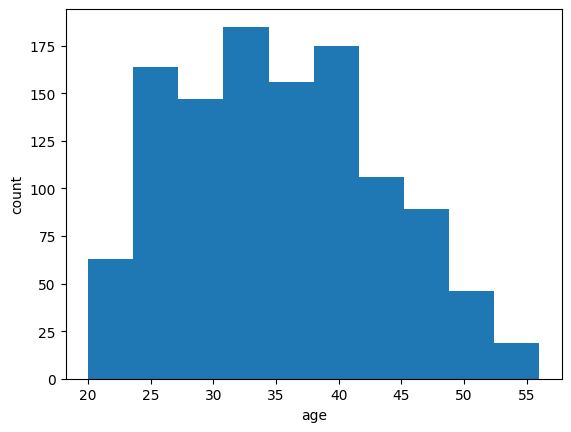

In [86]:
#Plot the age histogram
import matplotlib.pyplot as plt

df["age"]=df["age"].astype(int, copy=True)
plt.hist(df["age"])
plt.xlabel("age")
plt.ylabel("count")

Text(0, 0.5, 'count')

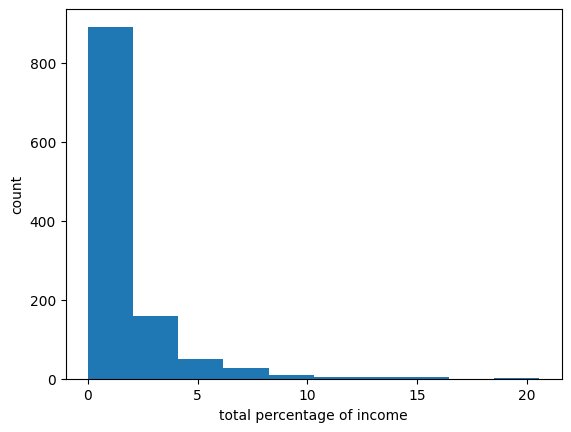

In [87]:
#convert values of column creddebt to floats 
df["creddebt"]=df["creddebt"].astype(float, copy=True)

#Histogram Creddit debt ratio
plt.hist(df["creddebt"])
plt.xlabel("total percentage of income")
plt.ylabel("count")

<AxesSubplot: xlabel='debtinc', ylabel='creddebt'>

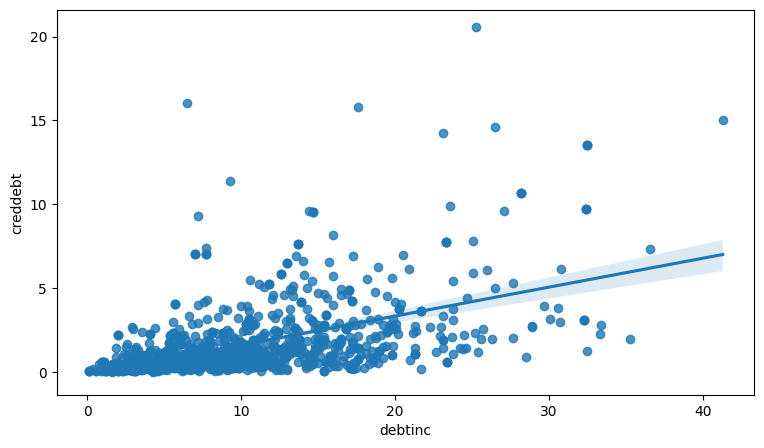

In [88]:
#Lets compute the linear relationship 
import seaborn as sns 

fig, ax = plt.subplots(figsize = (9,5))
df["creddebt"]=df["creddebt"].astype(float, copy=True)
df["debtinc"]=df["debtinc"].astype(float, copy=True)

sns.regplot(x="debtinc", y="creddebt", data=df)



Text(0, 0.5, 'mean_debtinc')

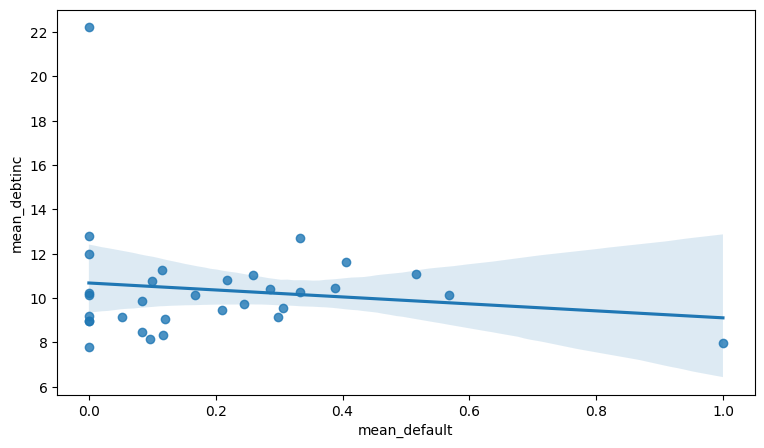

In [89]:
df['employ'].index
fig, ax = plt.subplots(figsize = (9,5))
#Average default ratio by employ
df["default"]=df["default"].astype(float, copy=True)
mean_default = df.groupby(['employ'])['default'].mean()

#Average debt employ percentage ratio by employ
df["debtinc"]=df["debtinc"].astype(float, copy=True)
mean_debtinc = df.groupby(['employ'])['debtinc'].mean()

#Linear Regression of debt income percentage ratio against default ratio
sns.regplot(x=mean_default, y=mean_debtinc)
ax.set_xlabel('mean_default')
ax.set_ylabel('mean_debtinc')

In [90]:
mean_default

employ
0     0.516129
1     0.387755
2     0.568182
3     0.404762
4     0.297872
5     0.305556
6     0.217391
7     0.210526
8     0.096774
9     0.244444
10    0.166667
11    0.115385
12    0.100000
13    0.259259
14    0.285714
15    0.052632
16    0.120000
17    0.083333
18    0.117647
19    0.083333
20    0.000000
21    0.000000
22    0.000000
23    0.000000
24    0.000000
25    0.333333
26    0.000000
27    0.000000
28    0.000000
29    1.000000
30    0.000000
31    0.333333
33         NaN
Name: default, dtype: float64

(array([299., 219., 177., 194., 100.,  77.,  46.,  14.,  10.,  14.]),
 array([ 0. ,  3.3,  6.6,  9.9, 13.2, 16.5, 19.8, 23.1, 26.4, 29.7, 33. ]),
 <BarContainer object of 10 artists>)

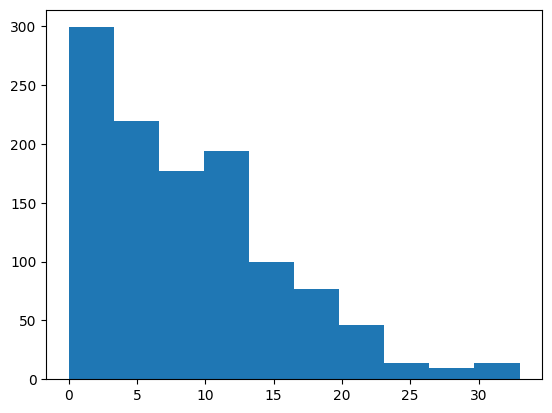

In [91]:
plt.hist(df['employ'])

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

# K-NN model
inertias = []
for i in range(2,14):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,14),inertias, marker='o', lw=2)

#  Predicting Risk: Using the K-Nearest Neighbors Classification Model

X, y = df.drop("default", axis=1), df["default"]
X_train, X_test, y_train, y_test = \
model_selection.train_test_split(X, y, test_size=0.20,random_state=0)

max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),
      ' to get the best prediction, then the average accuracy is ', max_score)

data = df

# Áp dụng phương pháp WOE

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19280\2200672538.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19280\2200672538.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, bins = bins, kde = use_kde

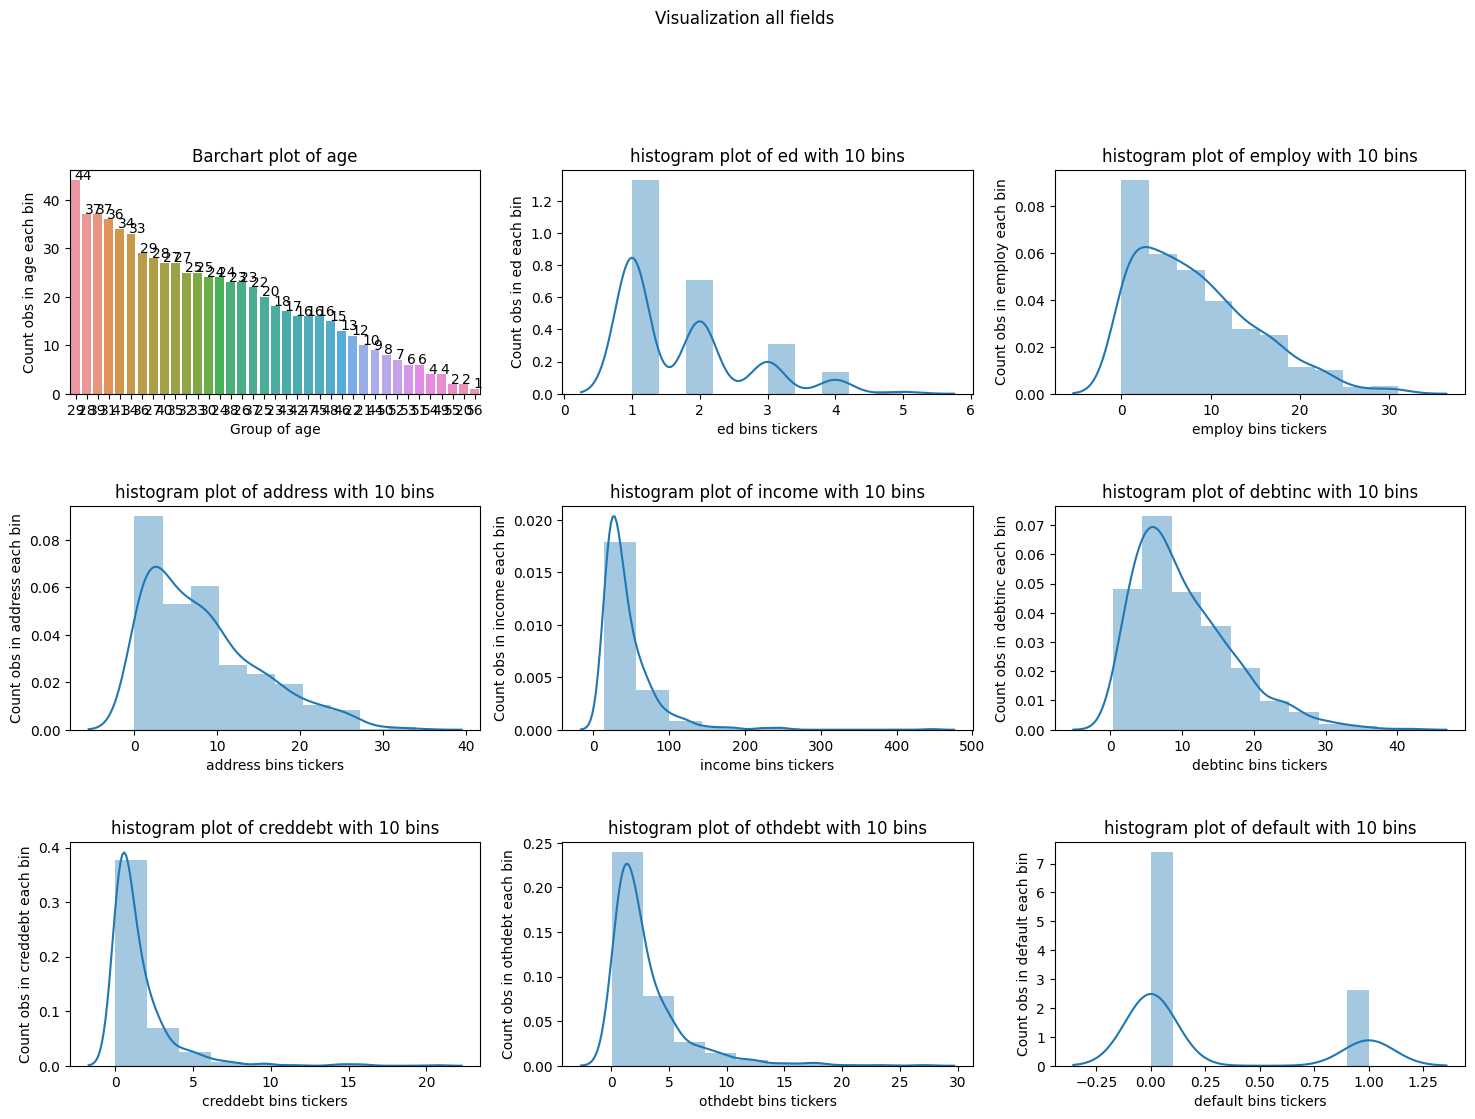

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
# Biểu đồ histogram
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
    x = x.dropna()
    xlabel = '{} bins tickers'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
    ax = sns.distplot(x, bins = bins, kde = use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
    xlabel = 'Group of {}'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'Barchart plot of {}'.format(fieldname)
    x = x.fillna('Missing')
    df_summary = x.value_counts(dropna = False)
    y_values = df_summary.values
    x_index = df_summary.index
    ax = sns.barplot(x = x_index, y = y_values, order = x_index)
    # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
    labels = list(set(x))
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax


# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(18, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
    if i <= 11:
        ax_i = fig.add_subplot(4, 3, i+1)
        if dtype in ['float64', 'int64']:
            ax_i = _plot_hist_subplot(data[fieldname], fieldname=fieldname)
        else:
            ax_i = _plot_barchart_subplot(data[fieldname], fieldname=fieldname)

fig.suptitle('Visualization all fields')
plt.show()

In [95]:
# Đối với biến numeric:
columns_num = data.select_dtypes(['float', 'int']).columns
data[columns_num] = data[columns_num].apply(lambda x: x.fillna(x.mean()), axis=0)
data[columns_num] 

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1.0
696,29,2,6,4,21,11.5,0.369495,2.045505,0.0
697,33,1,15,3,32,7.6,0.491264,1.940736,0.0
698,45,1,19,22,77,8.4,2.302608,4.165392,0.0


In [96]:
# Đối với biến category:
columns_obj = data.select_dtypes(['object']).columns
data[columns_obj] = data[columns_obj].apply(lambda x: x.fillna('Missing'), axis=0)

In [97]:
import numpy as np
import matplotlib.pyplot as plt

MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
    X = data[[colname, 'default']]
    X = X.sort_values(colname)
    coltype = X[colname].dtype

    if coltype in ['float', 'int']:
        if qcut is None:
            try:
                bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
                # Thay thế threshold đầu và cuối của thres
                thres[0] = MIN_VAL
                thres[-1] = MAX_VAL
                bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
                X['bins'] = bins
            except:
                print('n_bins must be lower to bin interval is valid!')
        else:
            bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
            X['bins'] = bins
    elif coltype == 'object':
        X['bins'] = X[colname]

    df_GB = pd.pivot_table(X,
                           index = ['bins'],
                           values = ['default'],
                           columns = ['default'],
                           aggfunc = {'default':np.size})

    df_Count = pd.pivot_table(X,
                              index = ['bins'],
                              values = ['default'],
                              aggfunc = {'default': np.size})
  
    if coltype in ['float', 'int']:
            df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
    elif coltype == 'object':
            df_Thres = pd.DataFrame(index=df_GB.index)
            thres = None
    
    df_Count.columns = ['No_Obs']
    df_GB.columns = ['#default', '#non-default']
    df_summary = df_Thres.join(df_Count).join(df_GB)
    return df_summary, thres

In [98]:
df_summary, thres = _bin_table(data, 'debtinc', qcut=[MIN_VAL, 2, MAX_VAL])
df_summary

,Thres,No_Obs,#default,#non-default
bins,,,,
"(-999999999, 2]",2,36,35,1
"(2, 999999999]",999999999,664,482,182


In [99]:
df_summary, thres = _bin_table(data, 'debtinc', n_bins=5)
df_summary

,Thres,No_Obs,#default,#non-default
bins,,,,
"(-999999999.0, 4.5]",4.500000e+00,148,135,13
"(4.5, 7.0]",7.000000e+00,133,111,22
"(7.0, 10.5]",1.050000e+01,143,115,28
"(10.5, 15.44]",1.544000e+01,136,95,41
"(15.44, 999999999.0]",1.000000e+09,140,61,79


In [100]:
def _WOE(data, colname, n_bins = None, min_obs = 100, qcut = None):
    # Thống kê bins và lấy ra thres hold ban đầu
    df_summary, thres = _bin_table(data, colname, n_bins = n_bins, qcut = qcut)
    # Thay thế giá trị 0 của #BAD trong df_summary bằng 1 để không bị lỗi chia cho 0
    df_summary['#default'] = df_summary['#default'].replace({0:1})

    if qcut is not None:
        # Lọc bỏ threshold để tạo thành threshold mới mà thỏa mãn số lượng quan sát >= min_obs
        exclude_ind = np.where(df_summary['No_Obs'] <= min_obs)[0]
        if exclude_ind.shape[0] > 0:
            new_thres = np.delete(thres, exclude_ind)
            print('Auto combine {} bins into {} bins'.format(n_bins, new_thres.shape[0]-1))
            # Tính toán lại bảng summary
            df_summary, thres = _bin_table(data, colname, qcut=new_thres)

    new_thres = thres
    df_summary['default/non-default'] = df_summary['#non-default']/df_summary['#default']
    df_summary['%default'] = df_summary['#default']/df_summary['#default'].sum()
    df_summary['%non-default'] = df_summary['#non-default']/df_summary['#non-default'].sum()
    df_summary['WOE'] = np.log(df_summary['%non-default']/df_summary['%default'])
    df_summary['IV'] = (df_summary['%non-default']-df_summary['%default'])*df_summary['WOE']
    df_summary['COLUMN'] = colname
    IV = df_summary['IV'].sum()
    print('Information Value of {} column: {}'.format(colname, IV))
    return df_summary, IV, new_thres

df_summary, IV, thres = _WOE(data, 'debtinc', n_bins = 7, min_obs= 100)
df_summary

Information Value of debtinc column: 0.6968065312949531


,Thres,No_Obs,#default,#non-default,default/non-default,%default,%non-default,WOE,IV,COLUMN
bins,,,,,,,,,,
"(-999999999.0, 3.6]",3.600000e+00,101,93,8,0.086022,0.179884,0.043716,-1.414601,0.192624,debtinc
"(3.6, 5.6]",5.600000e+00,101,88,13,0.147727,0.170213,0.071038,-0.873831,0.086662,debtinc
"(5.6, 7.5]",7.500000e+00,99,82,17,0.207317,0.158607,0.092896,-0.534949,0.035152,debtinc
"(7.5, 9.943]",9.942857e+00,99,78,21,0.269231,0.150870,0.114754,-0.273630,0.009882,debtinc
"(9.943, 13.2]",1.320000e+01,105,77,28,0.363636,0.148936,0.153005,0.026956,0.000110,debtinc
"(13.2, 17.514]",1.751429e+01,95,56,39,0.696429,0.108317,0.213115,0.676767,0.070923,debtinc
"(17.514, 999999999.0]",1.000000e+09,100,43,57,1.325581,0.083172,0.311475,1.320408,0.301453,debtinc


# Vẽ biểu đồ giá trị WOE của các bins.

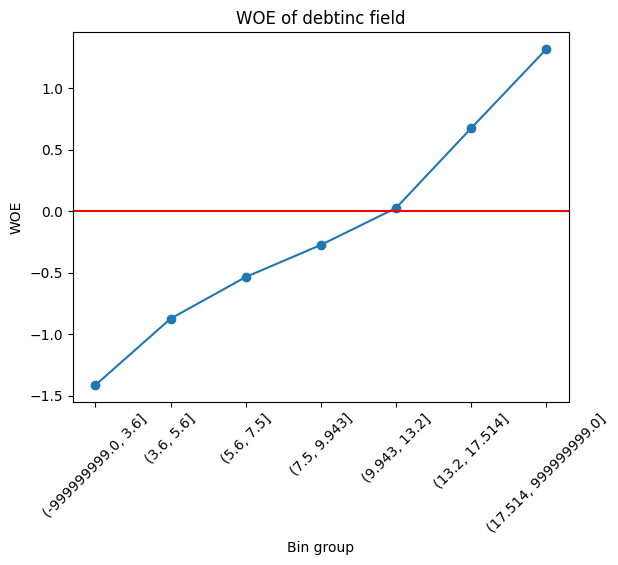

In [101]:
def _plot(df_summary):
    colname = list(df_summary['COLUMN'].unique())[0]
    df_summary['WOE'].plot(linestyle='-', marker='o')
    plt.title('WOE of {} field'.format(colname))
    plt.axhline(y=0, color = 'red')
    plt.xticks(rotation=45)
    plt.ylabel('WOE')
    plt.xlabel('Bin group')

_plot(df_summary)

In [102]:
data.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [103]:
# Đối với các biến numeric
WOE_dict=dict()
nbins = {'age': 10, 'debtinc':7,}
for (col, bins) in nbins.items():
    df_summary, IV, thres = _WOE(data, colname=col, n_bins = bins)
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

Information Value of age column: 0.24400037606590727
Information Value of debtinc column: 0.6968065312949531


In [123]:
for col in ['ed','employ']:
    df_summary, IV, thres = _WOE(data, colname=col, n_bins=5, qcut=[MIN_VAL, 2, MAX_VAL])
    WOE_dict[col] = {'table':df_summary, 'IV':IV}

KeyError: 'bins'

In [104]:
WOE_dict.update({'ed':8,'employ':8,'adress':10,'income':10,'default':2})

In [105]:
WOE_dict.keys()

dict_keys(['age', 'debtinc', 'ed', 'employ', 'adress', 'income', 'default'])

In [106]:
columns = []
IVs = []
for col in data.columns:
    if col != 'BAD':
        columns.append(col)
        IVs.append(WOE_dict[col]['IV'])
df_WOE = pd.DataFrame({'column': columns, 'IV': IVs})

def _rank_IV(iv):
    if iv <= 0.02:
        return 'Useless'
    elif iv <= 0.1:
        return 'Weak'
    elif iv <= 0.3:
        return 'Medium'
    elif iv <= 0.5:
        return 'Strong'
    else:
        return 'suspicious'

df_WOE['rank']=df_WOE['IV'].apply(lambda x: _rank_IV(x))
df_WOE.sort_values('IV', ascending=False)

TypeError: 'int' object is not subscriptable

In [107]:
for col in WOE_dict.keys():
    try:
        key = list(WOE_dict[col]['table']['WOE'].index)
        woe = list(WOE_dict[col]['table']['WOE'])
        d = dict(zip(key, woe))
        col_woe = col+'_WOE'
        data[col_woe] = data[col].map(d)
    except:
        print(col)

ed
employ
adress
income
default


In [108]:
X = data.filter(like='_WOE', axis = 1)
y = data['default']

In [109]:
from sklearn.model_selection import train_test_split

ids = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, ids, test_size = 0.2, stratify = y, shuffle = True, random_state = 123)

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (560, 2)
X_test shape:  (140, 2)
y_train shape:  (560,)
y_test shape:  (140,)


In [110]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(solver = 'lbfgs', max_iter=1000, fit_intercept=True, tol=0.0001, C=1, penalty='l2')
logit_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

In [111]:
from sklearn.metrics import accuracy_score

y_pred_train = logit_model.predict(X_train)
acc_train = accuracy_score(y_pred_train, y_train)
y_pred_test = logit_model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)

print('accuracy on train: ', acc_train)
print('accuracy on test: ', acc_test)

accuracy on train:  0.7642857142857142
accuracy on test:  0.7642857142857142


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19280\3701073048.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19280\3701073048.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


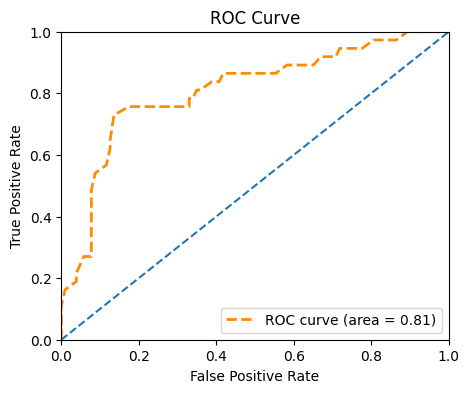

In [112]:
from sklearn.metrics import roc_curve, auc

y_pred_prob_test = logit_model.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (5,4))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

_plot_roc_curve(fpr, tpr, thres, roc_auc)

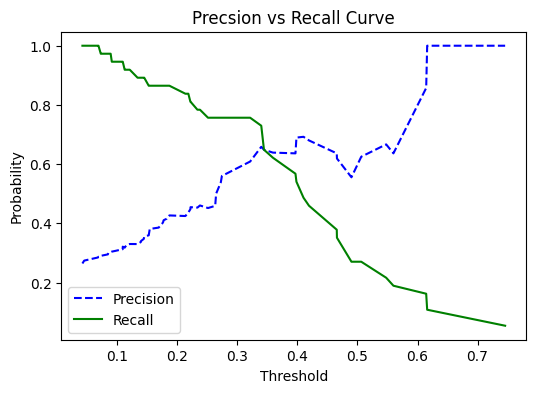

In [113]:
from sklearn.metrics import precision_recall_curve
precision, recall, thres = precision_recall_curve(y_test, y_pred_prob_test)

def _plot_prec_rec_curve(prec, rec, thres):
    plt.figure(figsize = (6,4))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()

_plot_prec_rec_curve(precision, recall, thres)

In [114]:
def _KM(y_pred, n_bins):
    _, thresholds = pd.qcut(y_pred, q=n_bins, retbins=True)
    cmd_BAD = []
    cmd_GOOD = []
    BAD_id = set(np.where(y_test == 0)[0])
    GOOD_id = set(np.where(y_test == 1)[0])
    total_BAD = len(BAD_id)
    total_GOOD = len(GOOD_id)
    for thres in thresholds:
        pred_id = set(np.where(y_pred <= thres)[0])
        # Đếm % số lượng hồ sơ BAD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_BAD = len(pred_id.intersection(BAD_id))/total_BAD
        cmd_BAD.append(per_BAD)
        # Đếm % số lượng hồ sơ GOOD có xác suất dự báo nhỏ hơn hoặc bằng thres
        per_GOOD = len(pred_id.intersection(GOOD_id))/total_GOOD
        cmd_GOOD.append(per_GOOD)
     
    cmd_BAD = np.array(cmd_BAD)
    cmd_GOOD = np.array(cmd_GOOD)
    return cmd_BAD, cmd_GOOD, thresholds

cmd_BAD, cmd_GOOD, thresholds = _KM(y_pred_prob_test, n_bins=10)


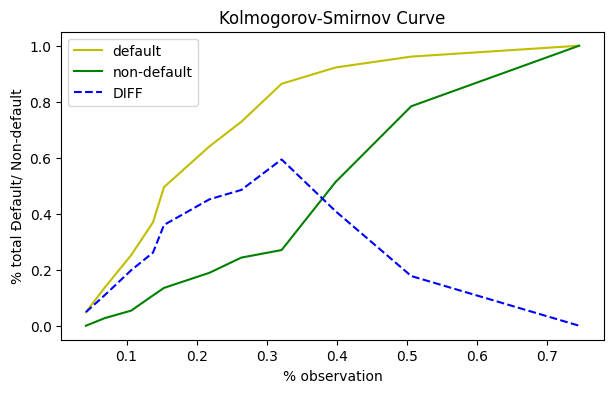

In [115]:
def _plot_KM(cmd_BAD, cmd_GOOD, thresholds):
    plt.figure(figsize = (7,4))
    plt.plot(thresholds, cmd_BAD, 'y-', label = 'default')
    plt.plot(thresholds, cmd_GOOD, 'g-', label = 'non-default')
    plt.plot(thresholds, cmd_BAD-cmd_GOOD, 'b--', label = 'DIFF')
    plt.xlabel('% observation')
    plt.ylabel('% total Đefault/ Non-default')
    plt.title('Kolmogorov-Smirnov Curve')
    plt.legend()

_plot_KM(cmd_BAD, cmd_GOOD, thresholds)

In [116]:
from scipy import stats

stats.ks_2samp(cmd_BAD, cmd_GOOD)

KstestResult(statistic=0.45454545454545453, pvalue=0.21147608841107293)

In [117]:
import numpy as np

def _CreditScore(beta, alpha, woe, n = 12, odds = 1/4, pdo = -50, thres_score = 700):
    factor = pdo/np.log(2)
    offset = thres_score - factor*np.log(odds)
    score = (beta*woe+alpha/n)*factor+offset/n
    return score

_CreditScore(beta = 0.5, alpha = -1, woe = 0.15, n = 12)

50.601122933703735

In [118]:
betas_dict = dict(zip(list(X_train.columns), logit_model.coef_[0]))
alpha = logit_model.intercept_[0]
betas_dict

{'age_WOE': 0.9817523030246149, 'debtinc_WOE': 0.9384929107428257}

In [119]:
cols = []
features = []
woes = []
betas = []
scores = []

for col in columns:
    for feature, woe in WOE_dict[col]['table']['WOE'].to_frame().iterrows():
        cols.append(col)
        # Add feature
        feature = str(feature)
        features.append(feature)    
        # Add woe
        woe = woe.values[0]
        woes.append(woe)
        # Add beta
        col_woe = col+'_WOE'
        beta = betas_dict[col_woe]
        betas.append(beta)
        # Add score
        score = _CreditScore(beta = beta, alpha = alpha, woe = woe, n = 12)
        scores.append(score)

df_WOE = pd.DataFrame({'Columns': cols, 'Features': features, 'WOE': woes, 'Betas':betas, 'Scores':scores})
df_WOE.head()

TypeError: 'int' object is not subscriptable

In [135]:
(data['default']==1).value_counts()

False    517
True     183
Name: default, dtype: int64

In [136]:
183/517

0.3539651837524178

In [138]:
(1/50)*log(2)

NameError: name 'log' is not defined